<a href="https://colab.research.google.com/github/chrisfinan/IDS/blob/main/HW6/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chris Finan

> 12/11/23

> Project 6


###Description


> In this problem, you will perform more data analyses on the adult_training dataset that was used previously: https://github.com/bforoura/IDS/blob/main/decision_trees.ipynb

> I will be creating methods that are used for creating decision tree classifiers, displaying, and comparing them. I will then analyze the data from the adult training data set with these methods



In [80]:
import pandas as pd
import numpy as np

## First I cleaned the data by examining and replacing the noise by imputing the correct average values.

In [81]:
# The adult_training dataset has several numeric and categoric predictors about adults, their
# occupation, marital status, economic status, financial status, etc.

adultDF= pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv")

In [82]:
# display info about the dataframe
adultDF.describe()

,age,education,capital-gain,capital-loss
count,14797.000000,14797.000000,14797.000000,14797.000000
mean,38.687437,10.068798,1066.581604,88.580793
std,13.678875,2.598297,7255.455373,406.322208
min,17.000000,1.000000,0.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000


In [83]:
#Converts the column's 0 values as well as 99999 values (which are most likely errors) to null values so that the the values other than the max can be observed
adultDF['capital-gain'] = adultDF['capital-gain'].replace(0, np.nan)
adultDF['capital-gain'] = adultDF['capital-gain'].replace(99999, np.nan)
adultDF['capital-loss'] = adultDF['capital-loss'].replace(0, np.nan)

In [84]:
# Fill null values in each column with their respective averages
adultDF['capital-gain'].fillna(adultDF['capital-gain'].mean(), inplace=True)
adultDF['capital-loss'].fillna(adultDF['capital-loss'].mean(), inplace=True)

#As you can see now, there are no 0 or 999 values and the data set looks clean based on this summary
#Because there was a lot of noise, some of the values in the summary are the same
adultDF.describe()

,age,education,capital-gain,capital-loss
count,14797.000000,14797.000000,14797.000000,14797.000000
mean,38.687437,10.068798,7637.383491,1877.836676
std,13.678875,2.598297,1600.365217,81.199257
min,17.000000,1.000000,114.000000,213.000000
25%,28.000000,9.000000,7637.383491,1877.836676
50%,37.000000,10.000000,7637.383491,1877.836676
75%,48.000000,12.000000,7637.383491,1877.836676
max,90.000000,16.000000,41310.000000,4356.000000


## 1. Write four functions to create classification models, record classification accuracy, and plot results. You will need to demonstrate your functions using the following calls (feel free to add extra formal function parameters, as necessary):
<br>...<br>
>cart_classifier = makeDTModel("gini", x_train, y_train)

>c5_classifier = makeDTModel("entropy", x_train, y_train)

<br>...

**display text and graphic representation of a tree classifier**
>displayTree(cart_classifier, x)

>displayTree(c5_classifier, x)

<br>...

**display text and heatmap of a confusion matrix**
>displayCM(cart_classifier, x_train, y_train, x_test, y_test)

>displayCM(c5_classifier, x_train, y_train, x_test, y_test)

<br>...

**create and display plots of side-by-side model comparisons**
>compareModels(cart_classifier, c5_classifier)



In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

def makeDTModel(crit, x_train, y_train, mln):
  #make the model using decision tree classifier with max leaf nodes as the mln param and random state as 120
  model = DecisionTreeClassifier(criterion = crit, max_leaf_nodes = mln, random_state = 120)
  #fit the model
  model.fit(x_train, y_train)
  return model


In [86]:
from matplotlib.pyplot import figure

def displayTree(classifier, x, md):
  # Control the figure size
  figure(figsize=(10, 8), dpi=80)
  #plot tree with given parameters and a max depth of param md
  tree.plot_tree(classifier, max_depth = md, feature_names=x.columns.values.tolist(), class_names=list(map(str, classifier.classes_)), filled = True)

In [87]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def displayCM(classifier, x_train, y_train, x_test, y_test):
  predictions = classifier.predict(x_test)
  #make and print confusion matrix
  cm = confusion_matrix(y_true = y_test, y_pred = predictions)
  print(cm)
  plt.figure(figsize=(8,8))

  #make a heatmap to further visualize the confusion matrix
  sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Oranges_r', fmt='0.4g');
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

In [88]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def compareModels(cart_classifier, c5_classifier):
  # Record CART's classification accuracy on tarining and test datasets
  score1 = round(cart_classifier.score(X_train, y_train), 2) # training score
  score2 = round(cart_classifier.score(X_test, y_test), 2)   # testing score

  # Record C5's classification accuracy on tarining and test datasets
  score3 = round(c5_classifier.score(X_train, y_train), 2) # training score
  score4 = round(c5_classifier.score(X_test, y_test), 2)   # testing score
  labels = ['CART', 'C5.0']

  training_scores = [score1, score3]
  testing_scores =  [score2, score4]

  x = np.arange(2)  # the label locations
  width = 0.35  # the width of the bars

  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, training_scores, width, label='Training', color='navy')
  rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing', color='orange')

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('Model Accuracy')
  ax.set_xticks(x)
  ax.set_ylim(0,1)
  ax.set_xticklabels(labels)
  ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

  plt.title('Model Comparisons')
  plt.show()



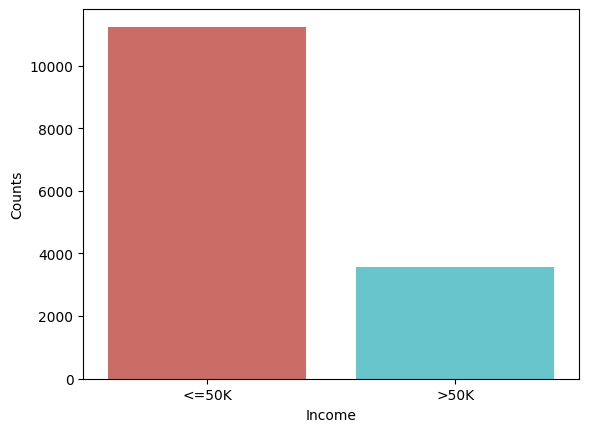

In [89]:
# Examine target class distrbutions

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='income', data=adultDF, palette = 'hls')
plt.xlabel('Income')
plt.ylabel('Counts')
plt.show()


In [90]:
# We now need to encode the categoric columns

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# save the encoded dataframe here
encoded_adultDF = pd.DataFrame()

# Encode  only the categoric or boolean attributes (if any)
for i in range(0, adultDF.shape[1]):
    if adultDF.dtypes[i]=='object' or adultDF.dtypes[i]=='bool':
        encoded_adultDF[adultDF.columns[i]] = le.fit_transform(adultDF[adultDF.columns[i]])
    else:
        encoded_adultDF[adultDF.columns[i]] = adultDF[adultDF.columns[i]]

encoded_adultDF.head(10)


,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,6,13,2,4,1,7637.383491,1877.836676,0
1,38,4,9,0,6,1,7637.383491,1877.836676,0
2,49,4,5,3,8,0,7637.383491,1877.836676,0
3,52,6,9,2,4,1,7637.383491,1877.836676,1
4,31,4,14,4,10,0,14084.000000,1877.836676,1
5,40,4,11,2,3,1,7637.383491,1877.836676,1
6,38,4,7,2,12,1,7637.383491,1877.836676,0
7,43,4,7,2,14,1,7637.383491,2042.000000,0
8,54,0,10,2,0,1,7637.383491,1877.836676,1
9,39,4,9,0,4,1,7637.383491,1877.836676,0


In [91]:
from sklearn.model_selection import train_test_split

# Prepare X and y
X = encoded_adultDF.filter(['marital-status','capital-gains-losses', 'sex', 'occupation', 'education', 'workclass', 'age'], axis=1)
y = encoded_adultDF['income']

# Let's do an 80-20 split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, train_size=0.80, stratify=y)

print("Training size:", X_train.shape)
print("Test size:", X_test.shape)

Training size: (11837, 6)
Test size: (2960, 6)


In [92]:
# Creates DT classifiers with max leaf nodes as 5
cart_classifier = makeDTModel("gini", X_train, y_train, 5)
c5_classifier = makeDTModel("entropy", X_train, y_train, 5)

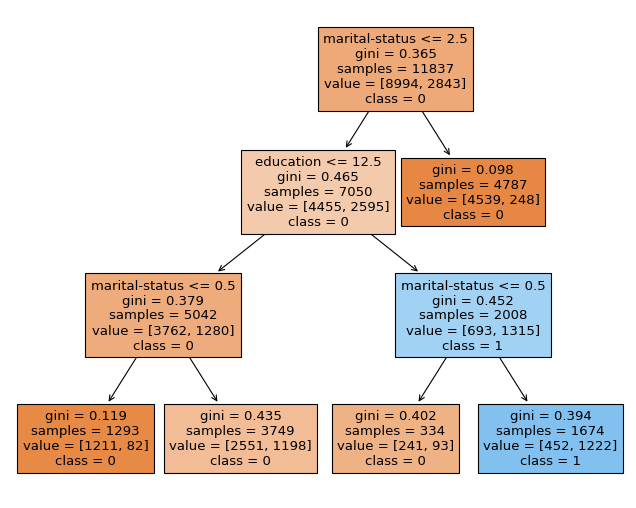

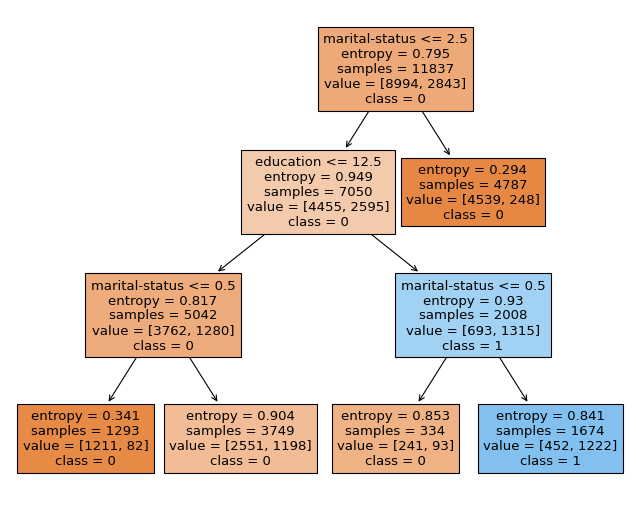

In [93]:
# display text and graphic representation of a tree classifier
# sets the max depth as 3
displayTree(cart_classifier, X, 3)
displayTree(c5_classifier, X, 3)

[[2143  106]
 [ 442  269]]
[[2143  106]
 [ 442  269]]


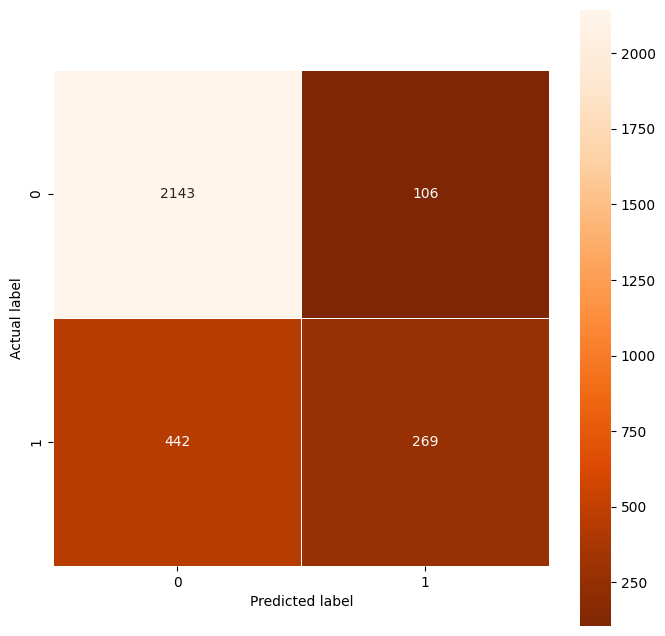

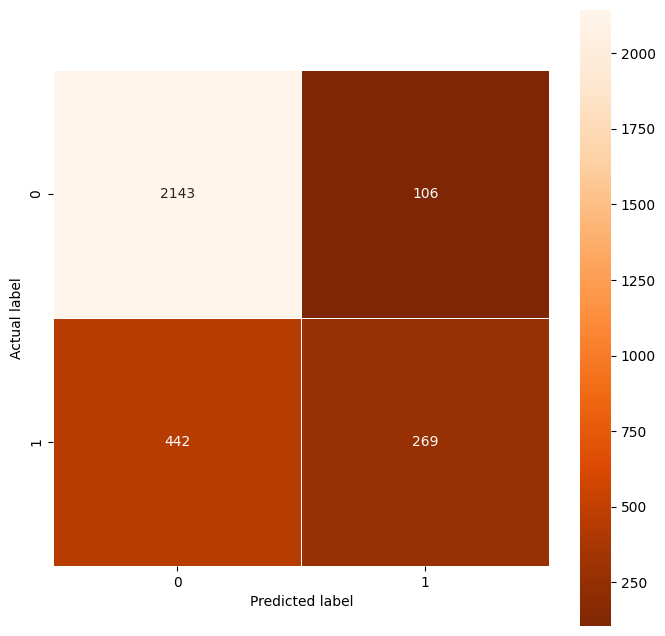

In [94]:
# display text and heatmap of a confusion matrix
displayCM(cart_classifier, X_train, y_train, X_test, y_test)
displayCM(c5_classifier, X_train, y_train, X_test, y_test)

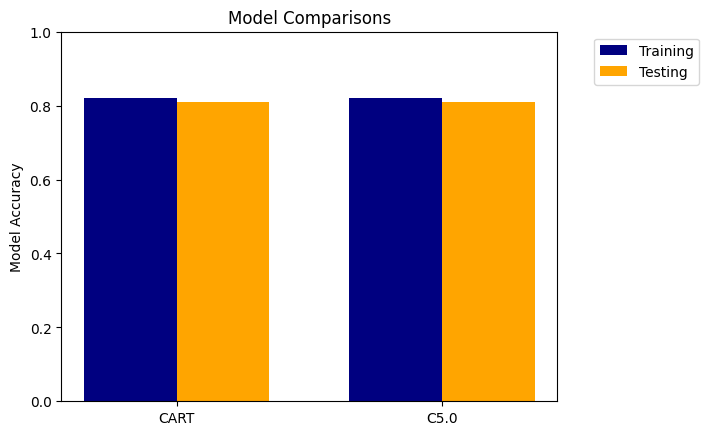

In [95]:
# create and display plots of side-by-side model comparisons
compareModels(cart_classifier, c5_classifier)

## 2. Analyze the effect of the parameters max_depth and max_leaf_nodes on classification accuracy. Plot the obtained accuracy values for various choices of max_depth (e.g. 2, 3, 4, none) and max_leaf_nodes (3, 4, 5, none).

In [96]:
# Record CART's classification accuracy on tarining and test datasets
score1 = round(cart_classifier.score(X_train, y_train), 2) # training score
score2 = round(cart_classifier.score(X_test, y_test), 2)   # testing score

print ("CART Training and Testing scores: %.2f, %.2f" %  (score1, score2))

# Record C5's classification accuracy on tarining and test datasets
score3 = round(c5_classifier.score(X_train, y_train), 2) # training score
score4 = round(c5_classifier.score(X_test, y_test), 2)   # testing score

print ("C5.0 Training and Testing scores: %.2f, %.2f" %  (score3, score4))

CART Training and Testing scores: 0.82, 0.81
C5.0 Training and Testing scores: 0.82, 0.81


In the above example, I set the max leaf nodes to 5 and the depth to 3. The two different classifiers had the same results. Two out of the five leaf nodes were great fits with very low values for gini/entropy.

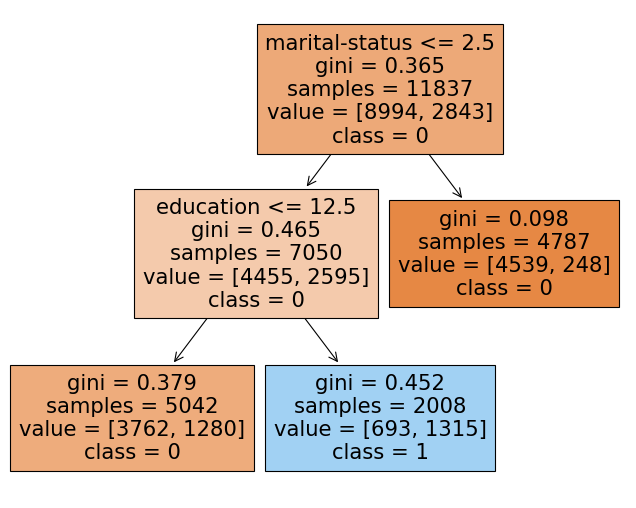

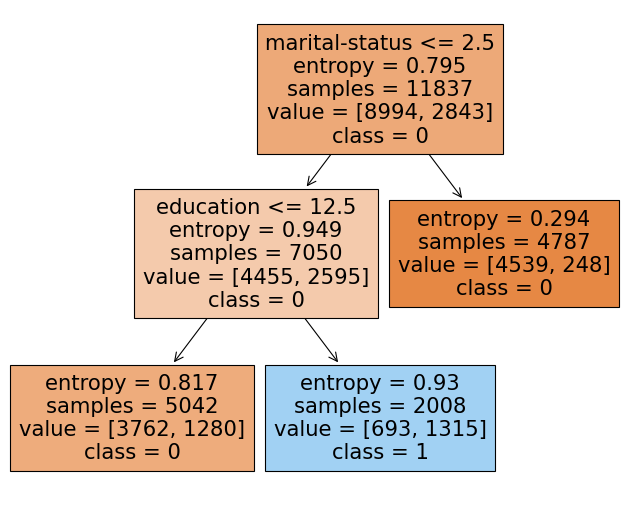

In [97]:
# Creates DT classifiers with max leaf nodes as 3
cart_classifier1 = makeDTModel("gini", X_train, y_train, 3)
c5_classifier1 = makeDTModel("entropy", X_train, y_train, 3)

# display text and graphic representation of a tree classifier
# sets the max depth as 2
displayTree(cart_classifier1, X, 2)
displayTree(c5_classifier1, X, 2)

Trying it with even less details yields similar results. The leaf nodes at the bottom have close to max entropy/gini, but the one at the top is the same as before.

In [98]:
# Record CART's classification accuracy on tarining and test datasets
score1 = round(cart_classifier1.score(X_train, y_train), 2) # training score
score2 = round(cart_classifier1.score(X_test, y_test), 2)   # testing score

print ("CART Training and Testing scores: %.2f, %.2f" %  (score1, score2))

# Record C5's classification accuracy on tarining and test datasets
score3 = round(c5_classifier1.score(X_train, y_train), 2) # training score
score4 = round(c5_classifier1.score(X_test, y_test), 2)   # testing score

print ("C5.0 Training and Testing scores: %.2f, %.2f" %  (score3, score4))

CART Training and Testing scores: 0.81, 0.80
C5.0 Training and Testing scores: 0.81, 0.80


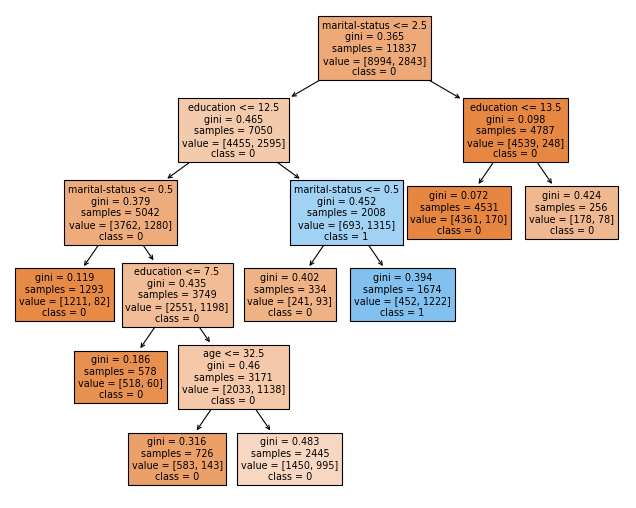

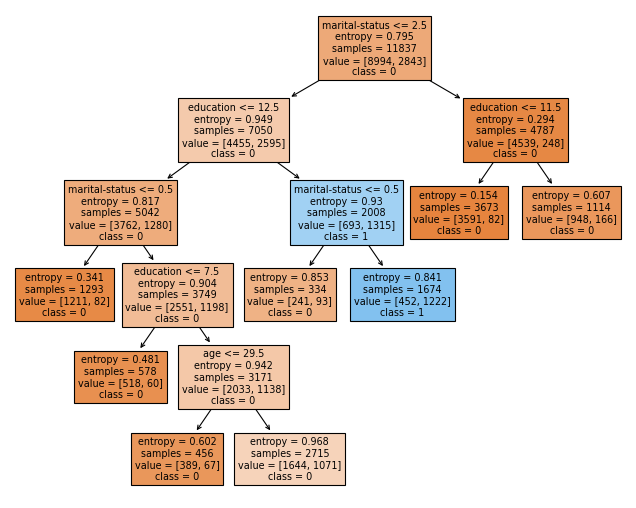

In [99]:
# Creates DT classifiers with max leaf nodes as 8
cart_classifier2 = makeDTModel("gini", X_train, y_train, 8)
c5_classifier2 = makeDTModel("entropy", X_train, y_train, 8)

# display text and graphic representation of a tree classifier
# sets the max depth as 8
displayTree(cart_classifier2, X, 8)
displayTree(c5_classifier2, X, 8)

Testing out a larger tree with a max depth of 8 and max leaf nodes of 8 yields more leaf nodes with lower entropy. However, there are stil some with high values, so at some point there needs to be a majority vote so losses are cut and there is no overfitting. Adding more leaf nodes/depth at this point makes the tree less visible and does not improve the entropy values by much.

In [100]:
# Record CART's classification accuracy on tarining and test datasets
score1 = round(cart_classifier2.score(X_train, y_train), 2) # training score
score2 = round(cart_classifier2.score(X_test, y_test), 2)   # testing score

print ("CART Training and Testing scores: %.2f, %.2f" %  (score1, score2))

# Record C5's classification accuracy on tarining and test datasets
score3 = round(c5_classifier2.score(X_train, y_train), 2) # training score
score4 = round(c5_classifier2.score(X_test, y_test), 2)   # testing score

print ("C5.0 Training and Testing scores: %.2f, %.2f" %  (score3, score4))

CART Training and Testing scores: 0.82, 0.81
C5.0 Training and Testing scores: 0.82, 0.81


It turns out that using 8 for both leaf nodes and depth yields the same accuracy as the tree with 5 leaf nodes and a max depth of 3. Using 3 leaf nodes with a max depth of 2 granted a slightly lower accuracy score. This shows that there is a sweet spot to be at without overfitting the data.

## 3. Summarize your findings

- I made 4 methods and I found that it would be more beneficial to add a parameter for max leaf nodes and max depth so that different numbers could be tested more efficiently.
- The model accuracy of both the CART and C5 classifiers was identical for every case in this data set (close to 80% for each testing case)
- All of the training scores (in this notebook) are 0.01 greater than the testing scores
- All of the decision trees looked very similar
- With most income being less than $50k, there was only 1 leaf node for high income in each of the decision tree classifiers tested
- The parameters max_depth and max_leaf_nodes make a slight difference and there is a sweet spot to find without overfitting
- max_leaf_nodes=8 and max_depth=8 yields the same accuracy as 5 and 3 respectively.

## Sources
- https://github.com/bforoura/IDS/blob/main/decision_trees.ipynb
- https://github.com/chrisfinan/IDS/blob/main/HW4/problem1_python.ipynb